In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from scipy.interpolate import spline

In [104]:
t1 = pd.read_csv("Trip 1 - 20170303/20170303_sec.csv")
t2 = pd.read_csv("Trip 2 - 20170307/20170307_sec.csv")
t3 = pd.read_csv("Trip 3 - 20170308/20170308_sec.csv")
t4 = pd.read_csv("Trip 4 - 20170309/20170309_sec.csv")
t5 = pd.read_csv("Trip 5 - 20170407/20170407_sec.csv")
ts = [t1, t2, t3, t4, t5]
t1 = t1.fillna(t1.mean())
t2 = t2.fillna(t2.mean())
t3 = t3.fillna(t3.mean())
t4 = t4.fillna(t4.mean())
t5 = t5.fillna(t5.mean())

In [105]:
t1.head()

gpsDate   latitude   longitude  Power_Mode  Fuel_Consum  \
0  2017-03-03T14:05:06  33.639271 -112.227554         0.0       0.5265   
1  2017-03-03T14:05:07  33.639271 -112.227556         0.0       0.5265   
2  2017-03-03T14:05:08  33.639273 -112.227559         0.0       0.5300   
3  2017-03-03T14:05:09  33.639275 -112.227559         0.0       0.5310   
4  2017-03-03T14:05:10  33.639275 -112.227561         0.0       0.5320   

   GD_Engine_Temp  Steering_Angle_Speed  Transmission_Type  Vehicle_Speed  \
0           999.0                 999.0                3.0            0.0   
1           999.0                 999.0                3.0            0.0   
2           999.0                 999.0                3.0            0.0   
3           999.0                 999.0                3.0            0.0   
4           999.0                 999.0                3.0            0.0   

   Engine_Speed        ...         RR_Window_State  Driver_Window_State  \
0    1292.96875        ...                     2.0             2.000000   
1    1294.53125        ...                     2.0             1.926829   
2    1298.43750        ...                     2.0             1.926829   
3    1294.53125        ...                     2.0             1.926829   
4    1297.65625        ...                     2.0             1.926829   

   RL_Window_State   AccelFB   AccelLR  Inlet_Switch_Indicator  \
0              2.0  0.071810  0.071810                0.454545   
1              2.0 -0.101512 -0.101512                0.454545   
2              2.0  0.071810  0.071810                0.000000   
3              2.0 -0.101512 -0.101512                0.454545   
4              2.0  0.071810  0.071810                0.454545   

   AC_Blower_Level  WhilteLine_Left  LKA_Steering_Support  WhilteLine_Right  
0         2.181818         2.000000              0.000000          2.000000  
1         2.181818         2.000000              0.000000          2.000000  
2         3.000000         1.172161              0.521638          1.170418  
3         2.181818         2.000000              0.000000          2.000000  
4         2.181818         1.172161              0.521638          1.170418  

[5 rows x 34 columns]

In [144]:
def plot_cons(df):
    plt.plot(df['Fuel_Consum'].rolling(window = 120).mean())
    plt.show()
    
def plot_loc(df):
    plt.plot(df['longitude'], df['latitude'])
    plt.show()
    
def plot_acc(df):
    df['AccelFB'].rolling(window = 120).mean().plot()
    plt.show()
    
def plot_vel(df):
    df['Vehicle_Speed'].plot()
    plt.show()
    
def plot_fuel(df):
    df['Fuel_Gauge'].rolling(window = 120).mean().plot()
    plt.show()
    
def plot_break(df):
    df['Brake_Control_Volume'].rolling(window = 120).mean().plot()
    plt.show()

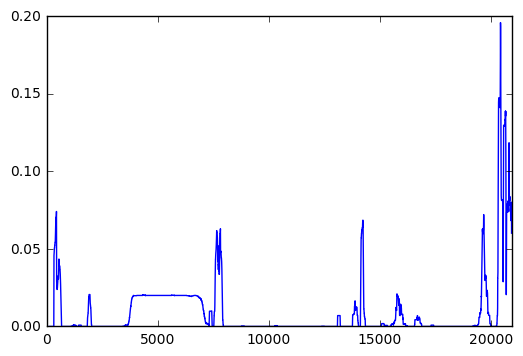

In [145]:
plot_break(t1)

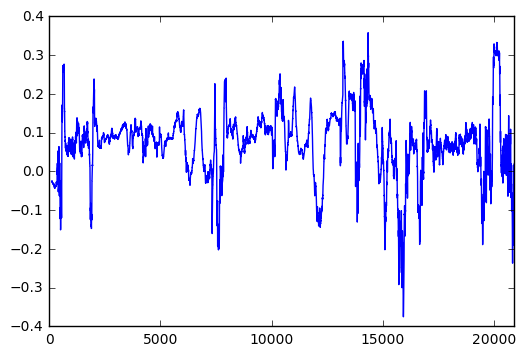

In [108]:
plot_acc(t1)

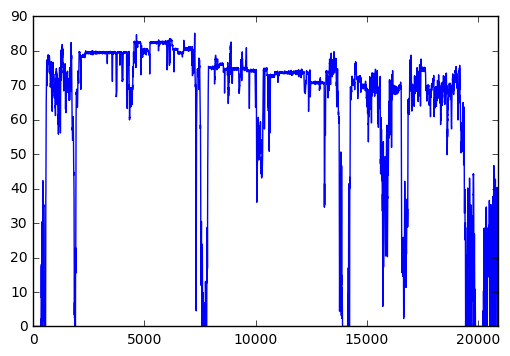

In [118]:
plot_vel(t1)

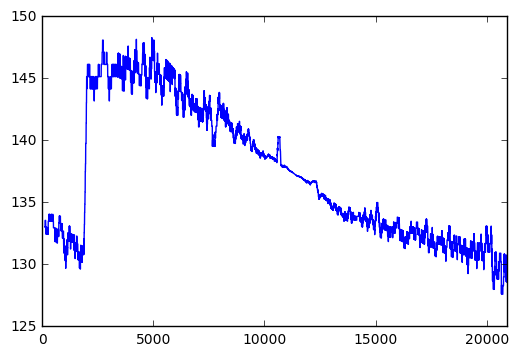

In [116]:
plot_fuel(t1)

In [62]:
t1.corr()

latitude  longitude  Power_Mode  Fuel_Consum  \
latitude                1.000000  -0.900864         NaN    -0.294489   
longitude              -0.900864   1.000000         NaN     0.302928   
Power_Mode                   NaN        NaN         NaN          NaN   
Fuel_Consum            -0.294489   0.302928         NaN     1.000000   
GD_Engine_Temp               NaN        NaN         NaN          NaN   
Steering_Angle_Speed         NaN        NaN         NaN          NaN   
Transmission_Type            NaN        NaN         NaN          NaN   
Vehicle_Speed          -0.306311   0.294690         NaN     0.578998   
Engine_Speed           -0.298272   0.326558         NaN     0.919845   
Brake_Control_Volume    0.021373  -0.034108         NaN    -0.139851   
Radar_Cruise_State           NaN        NaN         NaN          NaN   
Streering_Angle_Degree  0.117999  -0.207080         NaN    -0.105609   
Odometer_Reading        0.896704  -0.999579         NaN    -0.302518   
Hood_Courtesy                NaN        NaN         NaN          NaN   
Passenger_AC_Value     -0.150924   0.268324         NaN     0.174708   
Driver_AC_Value              NaN        NaN         NaN          NaN   
Fuel_Gauge             -0.675811   0.668839         NaN     0.427520   
Rear_Fog_Light               NaN        NaN         NaN          NaN   
Front_Fog_Light        -0.185018   0.332084         NaN     0.267137   
Lounge_Illum_Light      0.022046   0.022931         NaN    -0.283719   
Front_Dome_Light        0.092854  -0.138890         NaN    -0.222296   
Slide_Roof                   NaN        NaN         NaN          NaN   
Passenger_Window_State -0.105474  -0.066701         NaN    -0.265961   
RR_Window_State              NaN        NaN         NaN          NaN   
Driver_Window_State     0.174078  -0.107823         NaN     0.103664   
RL_Window_State              NaN        NaN         NaN          NaN   
AccelFB                -0.020022   0.019117         NaN     0.496474   
AccelLR                -0.020022   0.019117         NaN     0.496474   
Inlet_Switch_Indicator  0.658679  -0.722310         NaN    -0.188135   
AC_Blower_Level        -0.302547   0.160540         NaN    -0.540765   
WhilteLine_Left         0.186078  -0.180635         NaN    -0.396064   
LKA_Steering_Support   -0.365776   0.311619         NaN     0.364564   
WhilteLine_Right        0.175002  -0.177552         NaN    -0.414376   

                        GD_Engine_Temp  Steering_Angle_Speed  \
latitude                           NaN                   NaN   
longitude                          NaN                   NaN   
Power_Mode                         NaN                   NaN   
Fuel_Consum                        NaN                   NaN   
GD_Engine_Temp                     NaN                   NaN   
Steering_Angle_Speed               NaN                   NaN   
Transmission_Type                  NaN                   NaN   
Vehicle_Speed                      NaN                   NaN   
Engine_Speed                       NaN                   NaN   
Brake_Control_Volume               NaN                   NaN   
Radar_Cruise_State                 NaN                   NaN   
Streering_Angle_Degree             NaN                   NaN   
Odometer_Reading                   NaN                   NaN   
Hood_Courtesy                      NaN                   NaN   
Passenger_AC_Value                 NaN                   NaN   
Driver_AC_Value                    NaN                   NaN   
Fuel_Gauge                         NaN                   NaN   
Rear_Fog_Light                     NaN                   NaN   
Front_Fog_Light                    NaN                   NaN   
Lounge_Illum_Light                 NaN                   NaN   
Front_Dome_Light                   NaN                   NaN   
Slide_Roof                         NaN                   NaN   
Passenger_Window_State             NaN                   NaN   
RR_Window_State                    NaN 

In [110]:
ser = abs(t1.corr()['Fuel_Consum'].copy(True))
ser.sort_values()

Inlet_Switch_Indicator    0.003457
Driver_Window_State       0.006117
AC_Blower_Level           0.009936
Passenger_Window_State    0.015596
Passenger_AC_Value        0.065123
Front_Dome_Light          0.070455
Front_Fog_Light           0.083193
Lounge_Illum_Light        0.089923
Streering_Angle_Degree    0.105444
Fuel_Gauge                0.121215
Brake_Control_Volume      0.139828
Odometer_Reading          0.246288
latitude                  0.294463
LKA_Steering_Support      0.299078
longitude                 0.302895
WhilteLine_Left           0.324920
WhilteLine_Right          0.339942
AccelFB                   0.382884
AccelLR                   0.382884
Vehicle_Speed             0.578710
Engine_Speed              0.919653
Fuel_Consum               1.000000
Power_Mode                     NaN
GD_Engine_Temp                 NaN
Steering_Angle_Speed           NaN
Transmission_Type              NaN
Radar_Cruise_State             NaN
Hood_Courtesy                  NaN
Driver_AC_Value     

In [183]:
def gental_acc_score(df):
    #thresh is .25
    return len(df[abs(df['AccelFB']) < .25])/float(len(df['AccelFB']))

def steady_speed_score(df):
    freq = [point if point < 10000 else 10000 for point in abs(np.fft.rfft(df['Vehicle_Speed']))]
    return sum(freq[:len(freq)/4])/sum(freq)

def coast_2_decc_score(df):
    return len(df[abs(df['Brake_Control_Volume']) < .01])/float(len(df['Brake_Control_Volume']))

def high_speed_score(df):
    return len(df[abs(df['Vehicle_Speed']) < 76])/float(len(df['Vehicle_Speed']))

In [189]:
print gental_acc_score(t1), coast_2_decc_score(t1), high_speed_score(t1), steady_speed_score(t4)

0.785977154328 0.796874253214 0.734407111791 0.651645328607


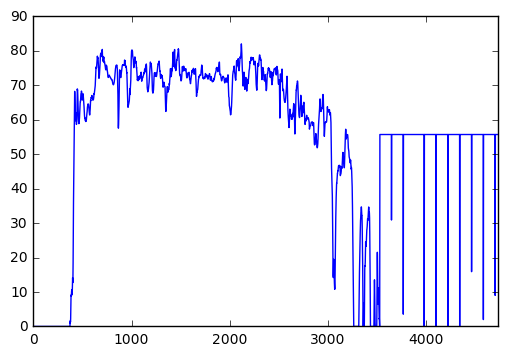

In [190]:
plot_vel(t4)#this is wrong possible becasuse of the way the nan's are being delt with

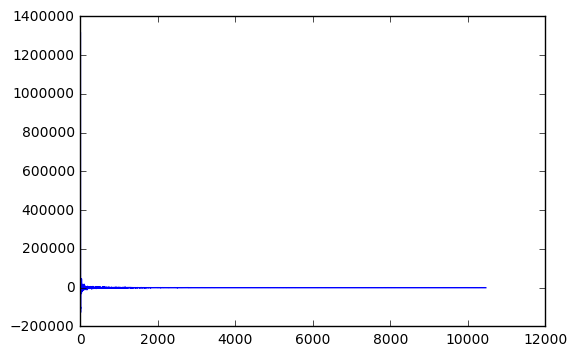

In [164]:
plt.plot(np.fft.rfft(t1['Vehicle_Speed']))
plt.show()

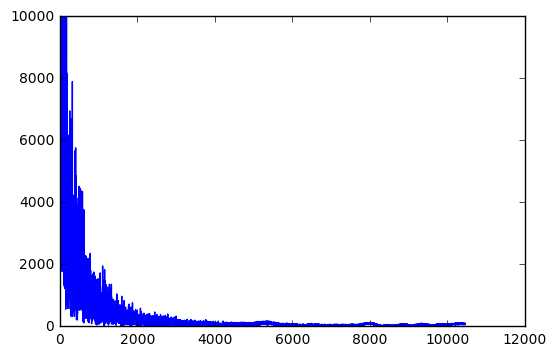

In [173]:
freq = [point if point < 10000 else 10000 for point in abs(np.fft.rfft(t1['Vehicle_Speed']))]
sum(freq[:len(freq)/4])/sum(freq)
plt.plot(freq)
plt.show()

In [179]:
sum(freq[:len(freq)/4])/sum(freq)

0.86613322551325067